In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
input_image = cv.imread("leaf.jpeg",0)
input_image.shape

(220, 229)

In [3]:
scale_percent = 50 # percent of original size
width = int(input_image.shape[1] * scale_percent / 100)
height = int(input_image.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
img = cv.resize(input_image, dim, interpolation = cv.INTER_AREA)

In [4]:
img.shape

(110, 114)

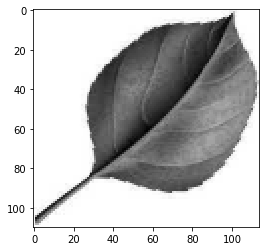

In [5]:
plt.imshow(img,cmap='gray')
#plt.imshow(input_image[:,:,2])

In [6]:
laplacian = cv.Laplacian(img,cv.CV_64F)

In [7]:
laplacian = np.uint(laplacian)

In [8]:
edges = cv.Canny(img,250,250)

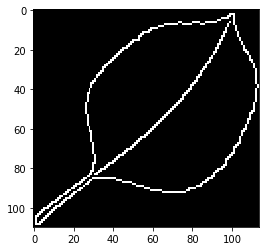

In [9]:
plt.imshow(edges,cmap='gray')

In [10]:
edges

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0, 255,   0, ...,   0,   0,   0],
       [  0, 255, 255, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

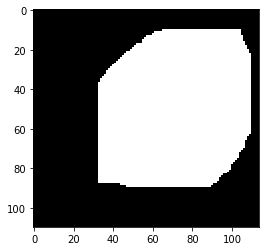

In [11]:
cnts = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    cv.drawContours(edges,[c], 0, (255,255,255), -1)

kernel = cv.getStructuringElement(cv.MORPH_RECT, (20,20))
mask = cv.morphologyEx(edges, cv.MORPH_OPEN, kernel, iterations=2)
mask = mask.astype(float) / 255
plt.imshow(mask,cmap='gray')

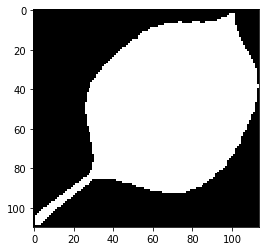

In [12]:
plt.imshow(edges,cmap='gray')

In [13]:
contour = edges.astype(float) / 255

In [14]:
contour = np.pad(contour, [(10, ), (10, )], mode='constant')

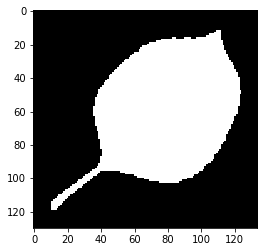

In [15]:
plt.imshow(contour,cmap='gray')

In [16]:
def getInitialPixel(ima):
    for i in range(len(ima)):
        for j in range(len(ima[0])):
            if ima[i][j]>0:
                return i,j

In [17]:
i,j = getInitialPixel(contour)

In [18]:
def vertexChainCode(ima):
    cad = ""
    ones = 0
    threes = 0
    points = []
    i,j = getInitialPixel(ima)
    points.append([i,j])
    act = [i+1,j] # counterclockwise tracking
    break_loop = 0
    while ones!=4+threes and break_loop<20000: # iterate till closed loop
        break_loop += 1
        pix = ima[act[0]-1:act[0]+1,act[1]-1:act[1]+1]
        pix_sum = np.sum(pix)
        cad += str(int(pix_sum))
        points.append(act[:])
        if pix_sum==1:
            ones += 1
            act = walk_corner1(pix,act)
        elif pix_sum==2:
            if pix[0][0]==pix[0][1]:
                if pix[0][0]==1:
                    act[1] +=1
                else:
                    act[1] -=1
            elif pix[0][0]==0:
                act[0] +=1
            else:
                act[0] -=1
        else:
            threes +=1
            act = walk_corner3(pix,act)
    pt = np.array(points).T
    fig = plt.figure(figsize=(10,6))
    plt.imshow(ima,'gray')
    dib = plt.scatter(pt[1],pt[0],2,c=np.arange(len(pt[0])),cmap='jet')
    plt.colorbar(dib)
    plt.show()
    return cad

In [19]:
def walk_corner1(pix,act):
    if pix[0][0]>0:
        return [act[0]-1,act[1]]
    elif pix[0][1]>0:
        return [act[0],act[1]+1]
    elif pix[1][0]>0:
        return [act[0],act[1]-1]
    else:
        return [act[0]+1,act[1]]

In [22]:
def walk_corner3(pix,act):
    if pix[0][0]==0:
        return [act[0],act[1]-1]
    elif pix[0][1]==0:
        return [act[0]-1,act[1]]
    elif pix[1][0]==0:
        return [act[0]+1,act[1]]
    elif pix[1][1]==0:
        return [act[0],act[1]+1]
    else:
        return [act[0]+1,act[1]+1]

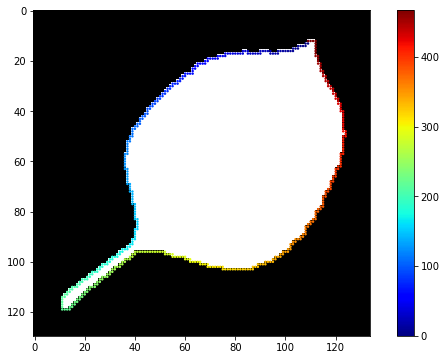

In [23]:
vcode = vertexChainCode(contour)

In [24]:
print(vcode)

313221321322222132231222132222312132222221322132221313221313123221313131321313131313131313131312313131231313122312312222312222213222221322132222132222213222312223123131321313132131313213131321313132131313213131313122221221313131313131313132131313132131313132131313213131322222222222312231222231231222312231222223122222222222132132213221313213132131231313213131223131313122313131222312313122312312231312222312222223121322222221322132132132131321321321322132213222221221
